In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('all_stocks_5yr.csv',parse_dates=True)

In [5]:
sbux=df[df['Name']=='SBUX'].copy()
sbux.head()


,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<Axes: >

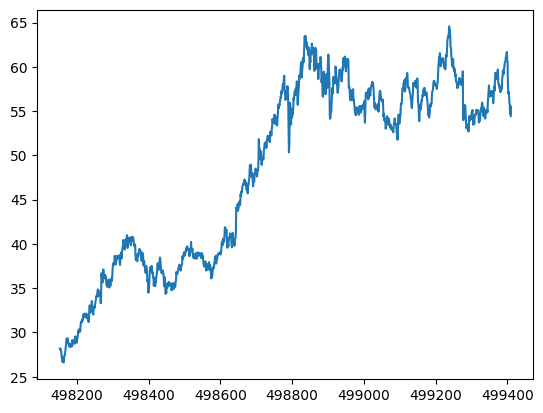

In [7]:
sbux['close'].plot()

In [10]:
sbux['prev_close']=sbux['close'].shift(1)

In [11]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [12]:
sbux['return']=sbux['close']/sbux['prev_close']-1

In [13]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [14]:
sbux['return2']=sbux['close'].pct_change(1)

In [15]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


<Axes: >

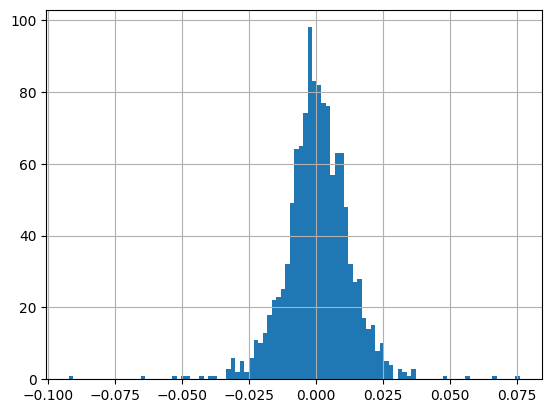

In [16]:
sbux['return'].hist(bins=100)

In [18]:
sbux['return'].mean(), sbux['return'].std()

(np.float64(0.0006002332205830914), np.float64(0.012360934026133879))

In [19]:
sbux['log_return']=np.log(sbux['return']+1)

In [20]:
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


<Axes: >

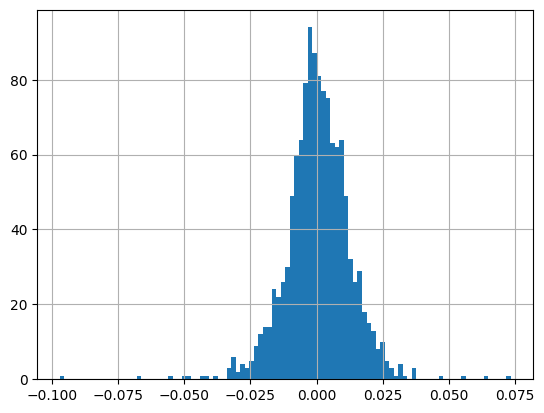

In [21]:
sbux['log_return'].hist(bins=100)

In [22]:
sbux['log_return'].mean(),sbux['log_return'].std()

(np.float64(0.0005235902748108682), np.float64(0.012381234216101258))

In [23]:
from scipy.stats import norm

In [24]:
x_list=np.linspace(sbux['return'].min(),sbux['return'].max(),100)

In [25]:
x_list

array([-0.09243697, -0.09073425, -0.08903152, -0.08732879, -0.08562606,
       -0.08392333, -0.0822206 , -0.08051787, -0.07881514, -0.07711241,
       -0.07540968, -0.07370696, -0.07200423, -0.0703015 , -0.06859877,
       -0.06689604, -0.06519331, -0.06349058, -0.06178785, -0.06008512,
       -0.05838239, -0.05667967, -0.05497694, -0.05327421, -0.05157148,
       -0.04986875, -0.04816602, -0.04646329, -0.04476056, -0.04305783,
       -0.0413551 , -0.03965238, -0.03794965, -0.03624692, -0.03454419,
       -0.03284146, -0.03113873, -0.029436  , -0.02773327, -0.02603054,
       -0.02432781, -0.02262509, -0.02092236, -0.01921963, -0.0175169 ,
       -0.01581417, -0.01411144, -0.01240871, -0.01070598, -0.00900325,
       -0.00730052, -0.0055978 , -0.00389507, -0.00219234, -0.00048961,
        0.00121312,  0.00291585,  0.00461858,  0.00632131,  0.00802404,
        0.00972677,  0.01142949,  0.01313222,  0.01483495,  0.01653768,
        0.01824041,  0.01994314,  0.02164587,  0.0233486 ,  0.02

In [26]:
y_list=norm.pdf(x_list,loc=sbux['return'].mean(),scale=sbux['return'].std())

In [27]:
y_list

array([1.61124038e-11, 4.50112662e-11, 1.23379004e-10, 3.31833649e-10,
       8.75706799e-10, 2.26754626e-09, 5.76119697e-09, 1.43624466e-08,
       3.51320317e-08, 8.43212896e-08, 1.98577642e-07, 4.58862527e-07,
       1.04038473e-06, 2.31453890e-06, 5.05235819e-06, 1.08213867e-05,
       2.27421141e-05, 4.68962254e-05, 9.48864233e-05, 1.88377661e-04,
       3.66955886e-04, 7.01386579e-04, 1.31540709e-03, 2.42059451e-03,
       4.37061993e-03, 7.74324810e-03, 1.34605388e-02, 2.29594165e-02,
       3.84253989e-02, 6.31008279e-02, 1.01674224e-01, 1.60748085e-01,
       2.49367520e-01, 3.79571066e-01, 5.66898683e-01, 8.30762588e-01,
       1.19455885e+00, 1.68537793e+00, 2.33316896e+00, 3.16923331e+00,
       4.22397530e+00, 5.52392360e+00, 7.08815312e+00, 8.92437177e+00,
       1.10250699e+01, 1.33642375e+01, 1.58952057e+01, 1.85501427e+01,
       2.12416130e+01, 2.38663972e+01, 2.63114858e+01, 2.84618428e+01,
       3.02092395e+01, 3.14612306e+01, 3.21492431e+01, 3.22347967e+01,
      

<Axes: >

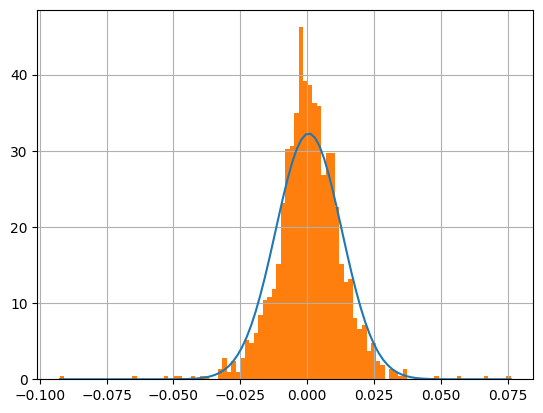

In [31]:
plt.plot(x_list,y_list)
sbux['return'].hist(bins=100,density=True)

In [32]:
from scipy.stats import probplot

((array([-3.26318411, -3.00291115, -2.85798028, ...,  2.85798028,
          3.00291115,  3.26318411]),
  array([-0.09243697, -0.06519128, -0.05321627, ...,  0.05617538,
          0.06623157,  0.0761332 ])),
 (np.float64(0.012069021175478527),
  np.float64(0.0006002332205830934),
  np.float64(0.9745536080830227)))

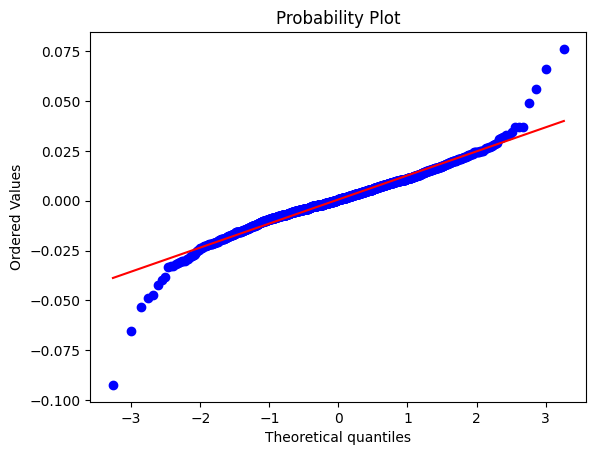

In [33]:
probplot(sbux['return'].dropna(),dist='norm',fit=True,plot=plt)

In [35]:
import statsmodels.api as sm

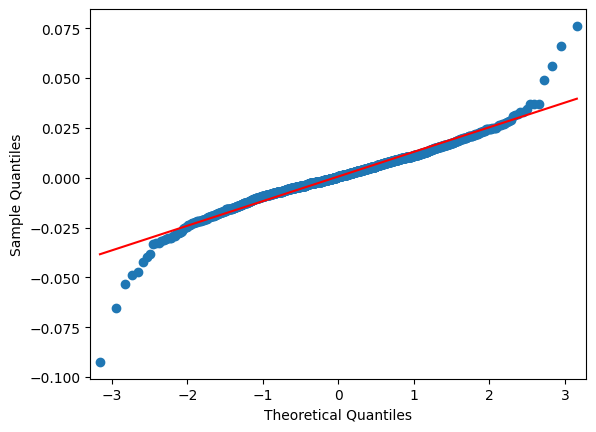

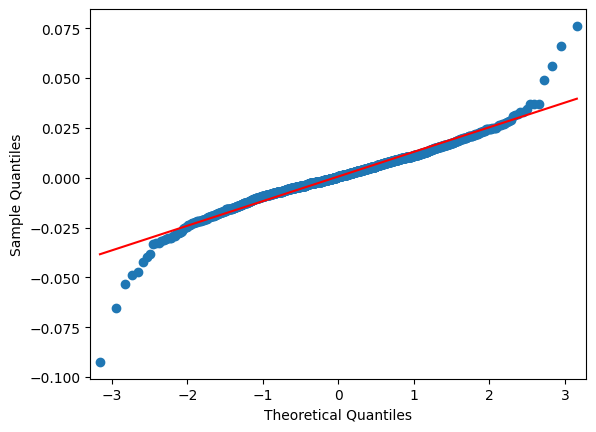

In [36]:
sm.qqplot(sbux['return'].dropna(),line='s')

In [37]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [38]:
y_list = norm.pdf(x_list,
                  loc=sbux['log_return'].mean(),
                  scale=sbux['log_return'].std())

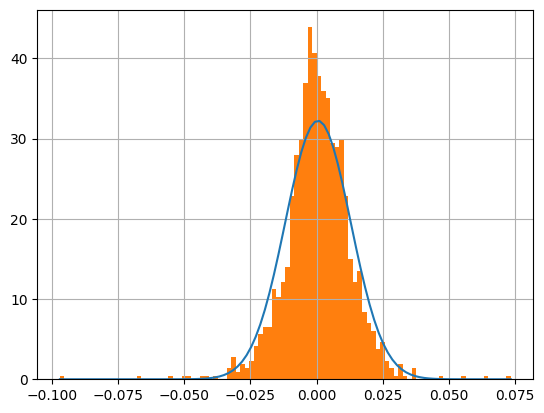

In [39]:
plt.plot(x_list, y_list);
sbux['log_return'].hist(bins=100, density=True);

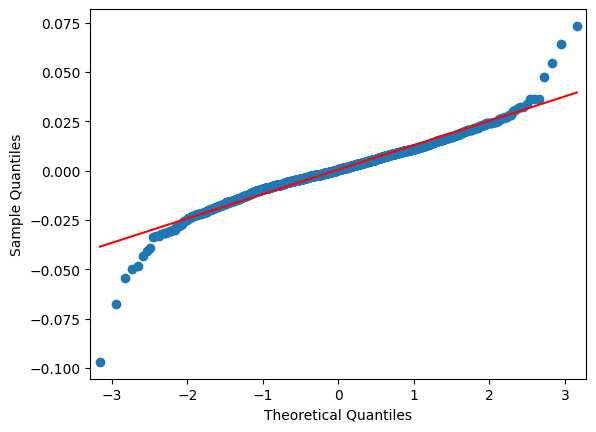

In [40]:
sm.qqplot(sbux['log_return'].dropna(), line='s');

In [41]:
from scipy.stats import t

In [51]:
x_list=np.linspace(sbux['return'].min(),sbux['return'].max(),100)

In [61]:
x_list

array([-0.09243697, -0.09073425, -0.08903152, -0.08732879, -0.08562606,
       -0.08392333, -0.0822206 , -0.08051787, -0.07881514, -0.07711241,
       -0.07540968, -0.07370696, -0.07200423, -0.0703015 , -0.06859877,
       -0.06689604, -0.06519331, -0.06349058, -0.06178785, -0.06008512,
       -0.05838239, -0.05667967, -0.05497694, -0.05327421, -0.05157148,
       -0.04986875, -0.04816602, -0.04646329, -0.04476056, -0.04305783,
       -0.0413551 , -0.03965238, -0.03794965, -0.03624692, -0.03454419,
       -0.03284146, -0.03113873, -0.029436  , -0.02773327, -0.02603054,
       -0.02432781, -0.02262509, -0.02092236, -0.01921963, -0.0175169 ,
       -0.01581417, -0.01411144, -0.01240871, -0.01070598, -0.00900325,
       -0.00730052, -0.0055978 , -0.00389507, -0.00219234, -0.00048961,
        0.00121312,  0.00291585,  0.00461858,  0.00632131,  0.00802404,
        0.00972677,  0.01142949,  0.01313222,  0.01483495,  0.01653768,
        0.01824041,  0.01994314,  0.02164587,  0.0233486 ,  0.02

In [53]:
params=t.fit(sbux['return'].dropna())

In [54]:
params

(np.float64(4.78753221828017),
 np.float64(0.0007108616716254146),
 np.float64(0.009341981642040986))

In [55]:
df,log,scale=params

In [56]:
y_list=t.pdf(x_list,df,log,scale)


<Axes: >

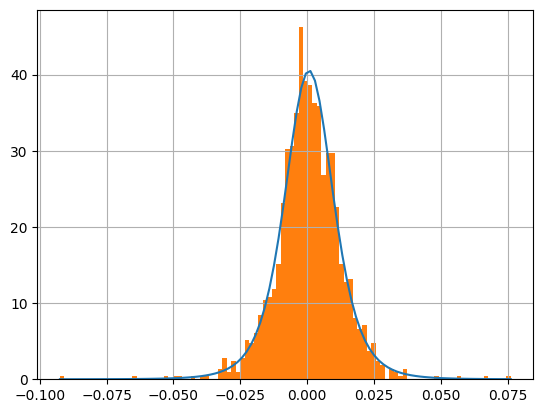

In [62]:
plt.plot(x_list,y_list)
sbux['return'].hist(bins=100,density=True)

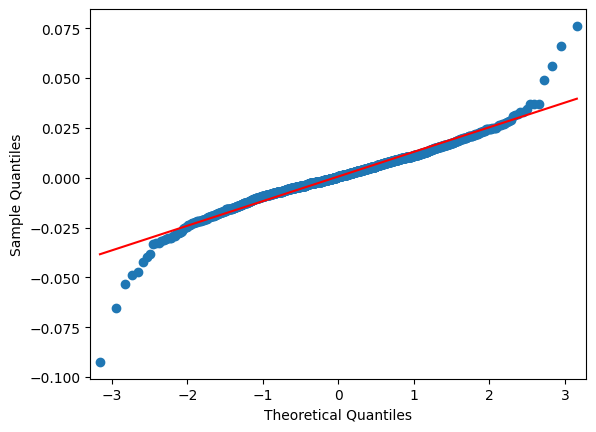

In [63]:
sm.qqplot(sbux['return'].dropna(), line='s');